# Intro

This notebook shows how to use uamutils Python package to work with Upper Atmosphere Model (UAM) data. 


## Workflow 
The general workflow is as such:

- start by loading a model data file
- now you can query the values of physical parameters
- you can also draw some common plots
    
    

# Loading model data

UAM stores data in binary files with a custom file format called _MOD4_. There is a function to load model data from such file:

    uamutils.load_mod4(path)

where _path_ is a path to the file you want to load.

In [1]:
# uamutils is our package for working with UAM data
import uamutils as uam

# loading model data from a binary file specified by path
data = uam.load_mod4('mod4-test-file')

# you get an object of UAMData class as a result
print(type(data))

<class 'uamutils.data.UAMData'>


# Querying model data 

## Available physical parameters

You can see the list of available physical parameters with `uamutils.params` function


## Querying data

By loading model data with `uamutils.load_mod4` you get an instance of _UAMData_ class, which you can use to query the data.

There are two ways to query physical parameters:

1) You can _select_ the exact model values with `UAMData.select` function

2) You can _interpolate_ model values with `UAMData.interp` function

In [2]:
# before we start querying model data, let's see the available parameters.
uam.params()

# the return value is a dictionary

# the keys are short names for physical parameters

# for each physical parameter there is 
# a 'long_name' - full name of a physical parameter
# and 'units' of measurement for the respective physical parameter

{'N(O2)': {'long_name': 'O2 number density', 'units': 'cm-3'},
 'N(N2)': {'long_name': 'N2 number density', 'units': 'cm-3'},
 'N(O)': {'long_name': 'O number density', 'units': 'cm-3'},
 'N(NO)': {'long_name': 'NO number density', 'units': 'cm-3'},
 'N(N)': {'long_name': 'N number density', 'units': 'cm-3'},
 'N(XY+)': {'long_name': 'Total positive molecular ion number density',
  'units': 'cm-3'},
 'Tn': {'long_name': 'Neutral temperature', 'units': 'K'},
 'Ti': {'long_name': 'Ion temperature', 'units': 'K'},
 'Te': {'long_name': 'Electron temperature', 'units': 'K'},
 'Vr': {'long_name': '', 'units': 'K'},
 'Vt': {'long_name': '', 'units': 'cm/s'},
 'Vd': {'long_name': '', 'units': 'cm/s'},
 'q(O2+)': {'long_name': 'O2+ ion production rate', 'units': 'cm-3/s'},
 'q(N2+)': {'long_name': 'N2+ ion production rate', 'units': 'cm-3/s'},
 'q(NO+)': {'long_name': 'NO+ ion production rate', 'units': 'cm-3/s'},
 'q(O+)': {'long_name': 'O+ ion production rate', 'units': 'cm-3/s'},
 'pot': {'l

## Selecting data

`UAMData.select(param_name, coords=None)`

_param_name_ is any of the keys (short names for physical parameters) from the dictionary returned by `uamutils.params()`

_coords_ is a return value of `uamutils.coords` function


### Forming coordinates

`uamutils.coords(altkm=None, colat=None, lon=None)`

There are multiple ways to form coordinates with this function
- individual coordinates
    - `uamutils.coords(altkm=120, lon=30)`
- list of coordinates
    - `uamutils.coords(altkm=[120, 125, 130], lon=[30, 35])`
- range (slice) of coordinates
    - `uam.coords(altkm=slice(100, 200))`
- combine the above approaches
    - `uam.coords(altkm=slice(100, 200), lon=[30, 35], colat=4)`

In [3]:
# if you don't specify the coordinates - all the present values are returned
data.select('N(N2)')

Param: N(N2) (N2 number density)
Units: cm-3
Reference frame: spherical geomagnetic
Interpolation: None
Time: 2013-03-14 14:52:00

Coordinates:
  * altkm    (altkm) float64 80.0 83.0 86.3 89.93 ... 407.5 443.3 482.6 525.9
  * colat    (colat) float64 0.0 2.0 4.0 6.0 8.0 ... 174.0 176.0 178.0 180.0
  * lon      (lon) float64 0.0 5.0 10.0 15.0 20.0 ... 340.0 345.0 350.0 355.0

Values:
[[[2.20867083e+14 2.20867083e+14 2.20867083e+14 ... 2.20867083e+14
   2.20867083e+14 2.20867083e+14]
  [2.21219287e+14 2.21239503e+14 2.21257572e+14 ... 2.21148520e+14
   2.21173686e+14 2.21197392e+14]
  [2.21824005e+14 2.21862508e+14 2.21897338e+14 ... 2.21685307e+14
   2.21734985e+14 2.21781256e+14]
  ...
  [2.96288688e+14 2.96551486e+14 2.96823042e+14 ... 2.95556866e+14
   2.95790807e+14 2.96034815e+14]
  [2.97012222e+14 2.97161137e+14 2.97313977e+14 ... 2.96597691e+14
   2.96729828e+14 2.96868274e+14]
  [2.97698679e+14 2.97698679e+14 2.97698679e+14 ... 2.97698679e+14
   2.97698679e+14 2.97698679e+14]]



In [4]:
nn2 = data.select('N(N2)')

# under the hood, the return value is an instance of UAMValues class
print(f'Type of returned value: {type(nn2)}\n')

# all the object attributes, which you could see in the cell output above,
#   can be accesed directly.
print(f'Param name: {nn2.param}\n')
print(f'Param units: {nn2.units}\n')
print(f'Reference frame: {nn2.ref_frame}\n')
print(f'Modelling time: {nn2.time}\n')
print(f'{nn2.coords}\n')
print(f'Values:\n{nn2.values}')

Type of returned value: <class 'uamutils.data.UAMValues'>

Param name: N(N2) (N2 number density)

Param units: cm-3

Reference frame: geomag

Modelling time: 2013-03-14 14:52:00

Coordinates:
  * altkm    (altkm) float64 80.0 83.0 86.3 89.93 ... 407.5 443.3 482.6 525.9
  * colat    (colat) float64 0.0 2.0 4.0 6.0 8.0 ... 174.0 176.0 178.0 180.0
  * lon      (lon) float64 0.0 5.0 10.0 15.0 20.0 ... 340.0 345.0 350.0 355.0

Values:
[[[2.20867083e+14 2.20867083e+14 2.20867083e+14 ... 2.20867083e+14
   2.20867083e+14 2.20867083e+14]
  [2.21219287e+14 2.21239503e+14 2.21257572e+14 ... 2.21148520e+14
   2.21173686e+14 2.21197392e+14]
  [2.21824005e+14 2.21862508e+14 2.21897338e+14 ... 2.21685307e+14
   2.21734985e+14 2.21781256e+14]
  ...
  [2.96288688e+14 2.96551486e+14 2.96823042e+14 ... 2.95556866e+14
   2.95790807e+14 2.96034815e+14]
  [2.97012222e+14 2.97161137e+14 2.97313977e+14 ... 2.96597691e+14
   2.96729828e+14 2.96868274e+14]
  [2.97698679e+14 2.97698679e+14 2.97698679e+14 ... 2.9

In [5]:
# querying with individual coordinates
data.select('q(O+)', uam.coords(colat=50, lon=40))

Param: q(O+) (O+ ion production rate)
Units: cm-3/s
Reference frame: spherical geomagnetic
Interpolation: None
Time: 2013-03-14 14:52:00

Coordinates:
  * altkm    (altkm) float64 80.0 83.0 86.3 89.93 ... 407.5 443.3 482.6 525.9
    colat    float64 50.0
    lon      float64 40.0

Values:
[9.99999968e-21 9.99999968e-21 1.43869427e-14 3.39750983e-07
 8.34267307e-03 1.91340339e+00 2.92383060e+01 1.68335052e+02
 3.17896515e+02 3.84296509e+02 5.97927246e+02 9.20168457e+02
 1.21390930e+03 1.41158948e+03 1.48958130e+03 1.45216797e+03
 1.32466809e+03 1.14175916e+03 9.36632751e+02 7.34951660e+02
 5.53302795e+02 4.00228088e+02 2.78208252e+02 1.85688675e+02
 1.18830246e+02 7.27526474e+01 4.25056381e+01 2.36297512e+01
 1.24592800e+01 6.23085785e+00]

In [6]:
# querying with a list of coordinates
data.select('Ti', uam.Coords(lon=[20, 25]))

Param: Ti (Ion temperature)
Units: K
Reference frame: spherical geomagnetic
Interpolation: None
Time: 2013-03-14 14:52:00

Coordinates:
  * altkm    (altkm) float64 80.0 83.0 86.3 89.93 ... 407.5 443.3 482.6 525.9
  * colat    (colat) float64 0.0 2.0 4.0 6.0 8.0 ... 174.0 176.0 178.0 180.0
  * lon      (lon) float64 20.0 25.0

Values:
[[[ 300.       300.     ]
  [ 215.78908  215.84456]
  [ 215.21806  215.33759]
  ...
  [ 200.9261   200.93028]
  [ 200.79128  200.79416]
  [ 300.       300.     ]]

 [[ 300.       300.     ]
  [ 215.48845  215.56271]
  [ 214.66142  214.8217 ]
  ...
  [ 194.80666  194.77702]
  [ 194.59558  194.57916]
  [ 300.       300.     ]]

 [[ 300.       300.     ]
  [ 213.29231  213.3755 ]
  [ 212.31625  212.49626]
  ...
  [ 189.51068  189.44904]
  [ 189.26979  189.2351 ]
  [ 300.       300.     ]]

 ...

 [[1460.607   1460.607  ]
  [1038.8849  1039.4866 ]
  [1034.7377  1035.7281 ]
  ...
  [1002.6062  1002.83026]
  [1007.2387  1007.39655]
  [1464.249   1464.249  ]]

 

In [9]:
# querying with a range of coordinates
data.select('N(XY+)', uam.Coords(altkm=slice(100, 200)))

Param: N(XY+) (Total positive molecular ion number density)
Units: cm-3
Reference frame: spherical geomagnetic
Interpolation: None
Time: 2013-03-14 14:52:00

Coordinates:
  * altkm    (altkm) float64 103.1 108.5 114.3 120.7 ... 153.6 163.9 175.3 187.8
  * colat    (colat) float64 0.0 2.0 4.0 6.0 8.0 ... 174.0 176.0 178.0 180.0
  * lon      (lon) float64 0.0 5.0 10.0 15.0 20.0 ... 340.0 345.0 350.0 355.0

Values:
[[[ 2168.2263   2168.2263   2168.2263  ...  2168.2263   2168.2263
    2168.2263 ]
  [ 2348.1045   2359.3152   2368.7104  ...  2306.2456   2321.289
    2335.3364 ]
  [ 2629.448    2669.6116   2703.7754  ...  2520.107    2544.3955
    2585.9246 ]
  ...
  [  677.9784    679.68555   681.2632  ...   671.86505   674.0851
     676.1165 ]
  [  660.03094   660.7531    661.34937 ...   657.1612    658.2278
     659.1868 ]
  [  644.4668    644.4668    644.4668  ...   644.4668    644.4668
     644.4668 ]]

 [[ 5273.7764   5273.7764   5273.7764  ...  5273.7764   5273.7764
    5273.7764 ]
  [

## Interpolating data

`interp(param_name, coords, method='nearest')`

With `interp` you specify _param_name_ and _coords_ just like with `select`, although you can't use a range of coordinates.

Additionaly you can choose between two interpolation methods by specifying the _method_ argument:
- nearest neighbour interpolation ('nearest' keyword)
- bilinear interpolation ('bilinear' keyword)


In [10]:
data.interp('pot', uam.coords(colat=73))

Param: pot (Electric potential)
Units: V
Reference frame: spherical geomagnetic
Interpolation: nearest
Time: 2013-03-14 14:52:00

Coordinates:
    colat    float64 74.0
  * lon      (lon) float64 0.0 5.0 10.0 15.0 20.0 ... 340.0 345.0 350.0 355.0

Values:
[-1.8417603e+11 -1.7152714e+11 -1.6050122e+11 -1.5032946e+11
 -1.4015132e+11 -1.3010159e+11 -1.1952241e+11 -1.0734005e+11
 -9.2755444e+10 -7.5467284e+10 -5.5607587e+10 -3.3179234e+10
 -8.7935283e+09  1.6499794e+10  4.2053427e+10  6.7359519e+10
  9.1837022e+10  1.1430527e+11  1.3383941e+11  1.4964484e+11
  1.6082371e+11  1.6681189e+11  1.6754318e+11  1.6517394e+11
  1.6139233e+11  1.5911598e+11  1.5362600e+11  1.4265105e+11
  1.3008670e+11  1.1834295e+11  1.0863541e+11  1.0172971e+11
  9.8070921e+10  9.7677222e+10  1.0017378e+11  1.0505473e+11
  1.1178998e+11  1.1984365e+11  1.2868894e+11  1.3781407e+11
  1.4668920e+11  1.5468213e+11  1.6094514e+11  1.6439504e+11
  1.6382788e+11  1.5822669e+11  1.4633134e+11  1.2671452e+11
  9.8269766e

In [11]:
# the 'interp' attribute shows the interpolation method used

nn2_interped = data.interp('Tn', uam.coords(altkm=120))

print(f'Interpolation method: {nn2_interped.interp}')
# By default it's a nearest neighbour interpolation 

Interpolation method: nearest


In [12]:
# using bilinear interpolation method 
data.interp('N(N2)', uam.coords(altkm=230), method='bilinear')

Param: N(N2) (N2 number density)
Units: cm-3
Reference frame: spherical geomagnetic
Interpolation: bilinear
Time: 2013-03-14 14:52:00

Coordinates:
  * colat    (colat) float64 0.0 2.0 4.0 6.0 8.0 ... 174.0 176.0 178.0 180.0
  * lon      (lon) float64 0.0 5.0 10.0 15.0 20.0 ... 340.0 345.0 350.0 355.0
    altkm    int32 230

Values:
[[1.08431334e+09 1.08431334e+09 1.08431334e+09 ... 1.08431334e+09
  1.08431334e+09 1.08431334e+09]
 [1.08601582e+09 1.08696376e+09 1.08788522e+09 ... 1.08310311e+09
  1.08407701e+09 1.08505065e+09]
 [1.08686248e+09 1.08886924e+09 1.09081911e+09 ... 1.08070622e+09
  1.08276086e+09 1.08481976e+09]
 ...
 [1.18218477e+09 1.18167916e+09 1.18111948e+09 ... 1.18338591e+09
  1.18303698e+09 1.18263756e+09]
 [1.18076948e+09 1.18046656e+09 1.18013901e+09 ... 1.18152399e+09
  1.18129926e+09 1.18104752e+09]
 [1.17826315e+09 1.17826315e+09 1.17826315e+09 ... 1.17826315e+09
  1.17826315e+09 1.17826315e+09]]

## Plotting graphs

`UAMData.plot(param, altkm, proj='geomagnetic', interp='nearest')`

With the help of `UAMData.plot` function you can draw some common plots

By specifying the _proj_ argument, you can choose between the following supported figure types:
- _proj='geomagnetic'_ - spherical geomagnetic coordinates, plate-carree projection
- _proj='geographic'_ - spherical geodetic coordinates, plate-carree projection
- _proj='geostationary'_ - spherical geomagnetic coordinates, geostatinary projection
- _proj='orthographic'_ - spherical geomagnetic coordinates, orthographic projection



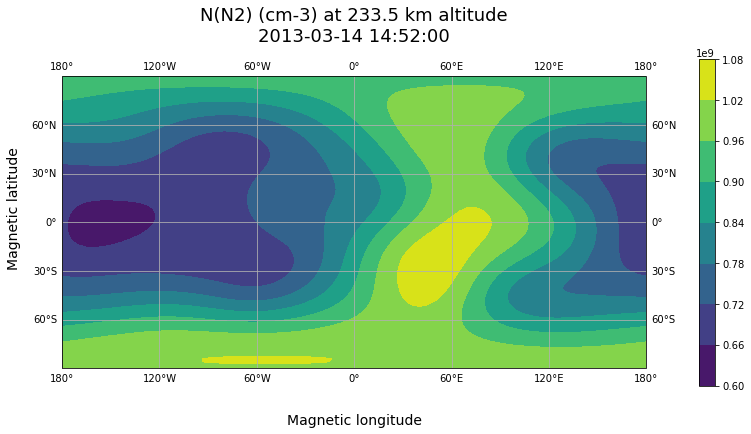

In [13]:
# we need pyplot to interactively display the plotted figures 
import matplotlib.pyplot as plt

fig, vals = data.plot('N(N2)', altkm=230, proj='geomagnetic')
# 'fig' is the resulting plot
# and 'vals' is the data used to make this plot

fig


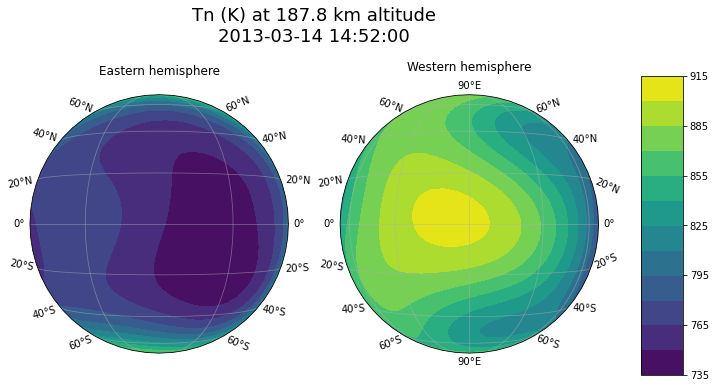

In [14]:
# geostationary projection
fig, vals = data.plot('Tn', altkm=187, proj='geostationary')

fig

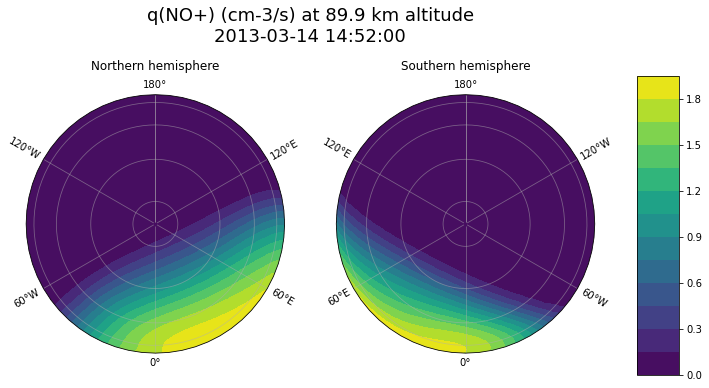

In [15]:
# orthographic projection
fig, vals = data.plot('q(NO+)', altkm=90, proj='orthographic')

fig

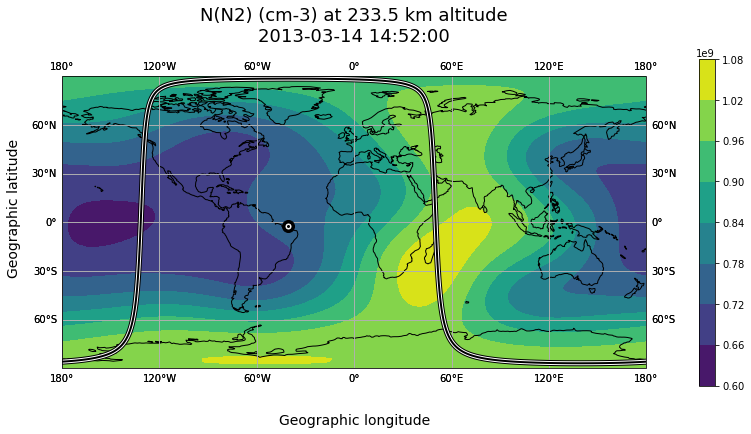

In [16]:
# spherical geodetic coordinates, plate-carree projection
fig, vals = data.plot('N(N2)', altkm=230, proj='geographic')

# this figure type includes the solar position (black-and-white circles)
#  and the day/night terminator (black-and-white line)
fig


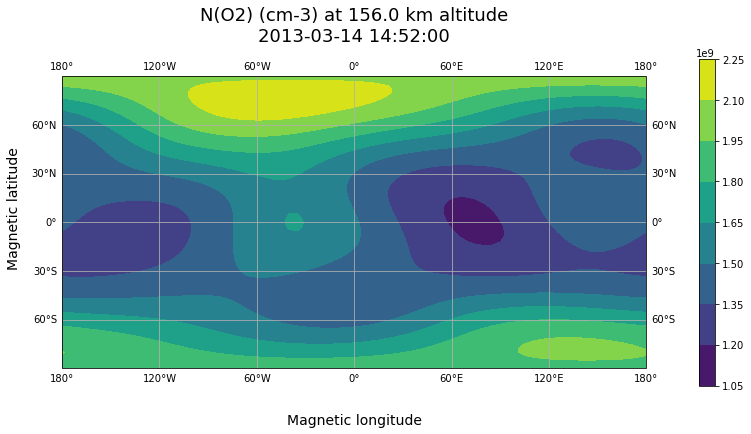

In [17]:
# by default the .plot() function uses nearest neighbour interpolation,
#  but you can also use the bilinear method.
fig, vals = data.plot('N(O2)', altkm=156, proj='geomagnetic', interp='bilinear')

fig